# Bounds on library size under sequence constraints

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 300

In [2]:
# MAX SSM LIBRARY SIZE PLOT

def f(L, k):
    return 4**k / (1+L-k)

def f_p4G(L, k):
    return f(L, k) - ((k-4+1) * 4**(k-4))
    
def f_p4N(L, k):
    return f(L, k) - 3*((k-4+1) * 4**(k-4))


ks = [4, 6, 8]
Ls = range(10, 20)

d = {
    
    "k": [],
    "Length": [],
    "# of sequences (log 10)": [],
    "Sequence constraint": []
}

for k in ks:
    for L in Ls:
        
        d["k"].append(k)
        d["Length"].append(L)
        d["# of sequences (log 10)"].append(np.log10(f(L, k)))
        d["Sequence constraint"].append("unconstrained")
        
        d["k"].append(k)
        d["Length"].append(L)
        d["# of sequences (log 10)"].append(np.log10(f_p4G(L, k)))
        d["Sequence constraint"].append("no 4G")
        
        d["k"].append(k)
        d["Length"].append(L)
        d["# of sequences (log 10)"].append(np.log10(f_p4N(L, k)))
        d["Sequence constraint"].append("no 4N")


d["Sequence length"] = d["Length"]
        
hm = pd.DataFrame(d)
hm.to_csv("constrained_library_sizes.csv")

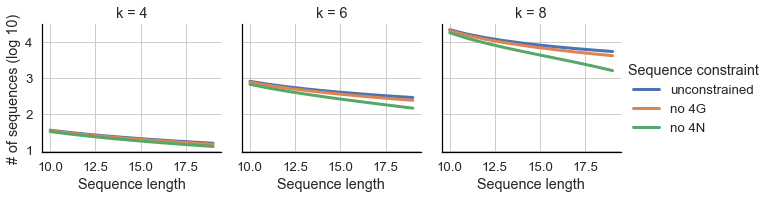

In [3]:
sns.set(font_scale=1.2, style='whitegrid')
rcParams['axes.edgecolor'] = 'black'

hg = sns.FacetGrid(hm, col="k", hue="Sequence constraint")
hg.map_dataframe(sns.lineplot, "Sequence length", "# of sequences (log 10)", lw=3)
hg.add_legend()
plt.savefig("EF4_sn7.pdf", bbox_inches = 'tight')